In [6]:
import pandas
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
%matplotlib inline
plt.style.use('bmh')
plt.style.use('dark_background')
#sys.path.append("./../sysinfo")
#from cute_device import get_cute_device_str
from helpers import read_df_from_dir

In [16]:
#path="/work/alex/data/DL_perf/json/"
path="../logs/scaling/"

In [17]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    max_height=200
    for rect in rects:
        height = rect.get_height()
        if height<15:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=14)
        if height>max_height:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*max_height, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=14, color="red")

In [18]:
def read_file(filename):
    with open(filename) as f:
        data = json.load(f)
    return data
data=read_file("../logs/scaling/conv2d_2_chainer_GeForce GTX 980 Ti_17.06.10_17.33.42.json")

In [27]:
data = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) and not f.startswith("arch") ]
#df = pandas.DataFrame(data)
#df
data

['conv2d_2_chainer_GeForce GTX 980 Ti_17.06.10_17.35.03.json',
 'conv2d_2_chainer_GeForce GTX 980 Ti_17.06.10_17.34.18.json',
 'conv2d_2_chainer_GeForce GTX 980 Ti_17.06.10_17.33.42.json']

In [25]:
df = read_df_from_dir(path)

NameError: name 'pandas' is not defined

In [15]:
df

,batch_size,bytes_x_train,cnt_classes,cpu_brand,cpu_count,device,framework,framework_full,gpu,gpus,hostname,hostname_short,linux,nb_gpus,path_out,problem,shape_x_train,time
0,512,456649800,57,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,tensorflow,Keras-2.0.3/tensorflow_1.1.0-rc1,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,lstm_char1,"[200285, 40, 57]",38.029440
1,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz,36,E5-2699,theano,Keras-2.0.3/theano_0.9.0,Tesla K40c,NaN,paris0.m.gsic.titech.ac.jp,paris0,Linux-3.10.0-327.36.2.el7.x86_64-x86_64-with-c...,0,/work/alex/data/DL_perf/json,conv3d_1,"[1024, 1, 32, 32, 32]",12.665777
2,8,134217728,1,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,theano,Keras-2.0.4/theano_0.9.0,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_1,"[2048, 1, 128, 128]",0.455705
3,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,chainer,Chainer-2.0.0a1,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_2,"[2048, 1, 128, 128]",4.893002
4,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz,36,E5-2699,chainer,Chainer-2.0.0a1,Tesla K40c,NaN,paris0.m.gsic.titech.ac.jp,paris0,Linux-3.10.0-327.36.2.el7.x86_64-x86_64-with-c...,0,/work/alex/data/DL_perf/json,conv2d_1,"[2048, 1, 128, 128]",77.309290
5,512,456649800,57,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,theano,Keras-2.0.3/theano_0.9.0,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,lstm_char1,"[200285, 40, 57]",29.548766
6,8,134217728,1,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,theano,Keras-2.0.3/theano_0.9.0,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_1,"[2048, 1, 128, 128]",0.444422
7,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,chainer,Chainer-2.0.0a1,Tesla P100-PCIE-16GB,NaN,roma5.m.gsic.titech.ac.jp,roma5,Linux-3.10.0-327.18.2.el7.x86_64-x86_64-with-c...,1,/work/alex/data/DL_perf/json,conv2d_1,"[2048, 1, 128, 128]",3.234017
8,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz,36,E5-2699,tensorflow,Keras-2.0.3/tensorflow_1.1.0-rc1,Tesla K40c,NaN,paris0.m.gsic.titech.ac.jp,paris0,Linux-3.10.0-327.36.2.el7.x86_64-x86_64-with-c...,0,/work/alex/data/DL_perf/json,conv2d_1,"[2048, 1, 128, 128]",0.874078
9,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz,36,E5-2699,tensorflow,Keras-2.0.3/tensorflow_1.1.0-rc1,Tesla K40c,NaN,paris0.m.gsic.titech.ac.jp,paris0,Linux-3.10.0-327.36.2.el7.x86_64-x86_64-with-c...,0,/work/alex/data/DL_perf/json,conv3d_1,"[1024, 1, 32, 32, 32]",8.861501


In [16]:
#df.sort_values(by=["device","framework"],inplace=True)
#df.sort_values(by=["time"],inplace=True)

In [17]:
#filter what to plot
devices=df["device"].unique()
print(devices)
#df

['P100-PCIE' 'E5-2699']


In [19]:
#df_filtered = filter_by(df,filters={"device":"P100-PCIE"})

In [20]:
def render(key,filters,color):
    id_dev=0
    df_filtered = filter_by(df,filters)
    df_plot=df_filtered.groupby([key],as_index=False).mean()
    if df_plot.shape[0]<1:
        return "nothing to plot"
    df_plot.reset_index()
    df_plot.sort_values(by=["time"],inplace=True, ascending=False)

    mpl.rcParams['figure.figsize'] = 12, 5
    ax = plt.subplot('111')#, facecolor='white')
    width=0.5
    #ax.set_ylim(0,200)
    err = df_filtered.groupby([key]).std()["time"]
    #print (err)
    error_config = {'ecolor': 'r'}
    bars = plt.bar(np.arange(len(df_plot))+width/2,df_plot["time"],width=width,color=color, yerr=err, error_kw=error_config)
    autolabel(bars,ax)
    plt.ylabel("epoch time, s",size=18)
    plt.xticks(np.arange(len(df_plot))+0.25)
    plt.yticks(size=18)
    
    #ax.set_xticks(np.arange(len(labels))+(width*cnt_models)/2, minor=False)
    #ax.set_xticklabels(df["device"], minor=False,size=18,rotation=0)
    ax.set_xticklabels(df_plot[key], minor=False,size=18,rotation=0)
    plt.grid(b=False, which='major', axis='x', )

    plt.tick_params(axis='x', which='both', bottom='off', top='off',  labelbottom='on')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    name_out=""
    title = ""
    for key in filters:
        name_out+=filters[key]+"_"
        title+=filters[key]+"  "
    name_out = name_out[:-1]
    plt.title(title[:-1])
    print(name_out)
    plt.savefig(os.path.join("./plots",name_out+".svg"),bbox_inches="tight",transparent=True)
    plt.show()
#todo: time per byte

chainer_conv2d_2


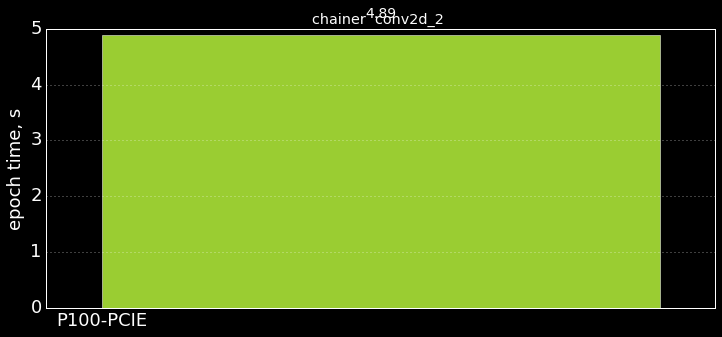

In [21]:
#render(key="framework",filters={"device":"P100-PCIE","problem":"conv2d_1"},color="yellowgreen")

render(key="device",filters={"framework":"chainer","problem":"conv2d_2"},color="yellowgreen")

P100-PCIE_lstm_char1


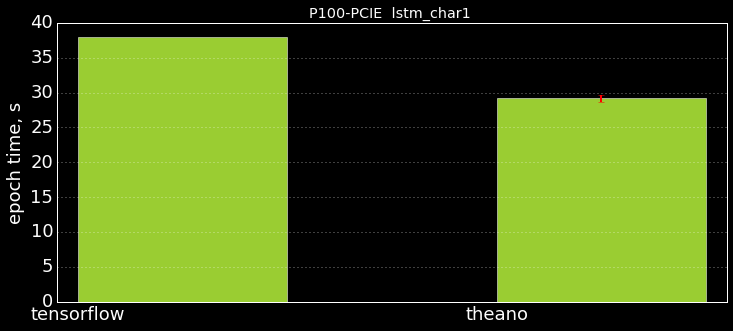

P100-PCIE_conv3d_1


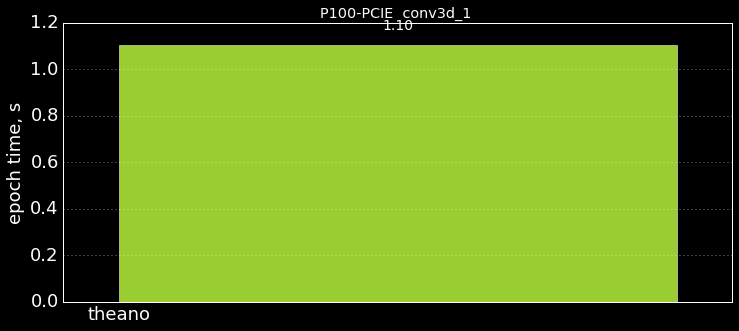

P100-PCIE_conv2d_1


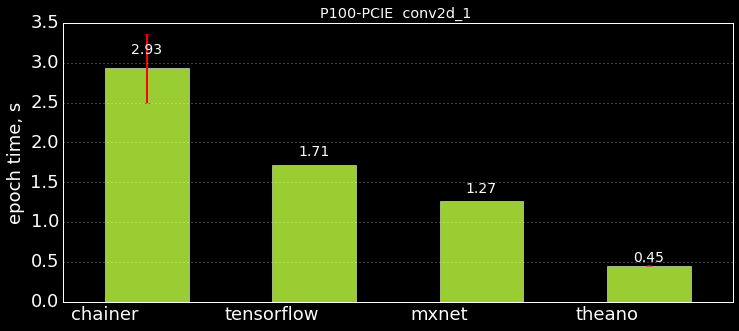

P100-PCIE_conv2d_2


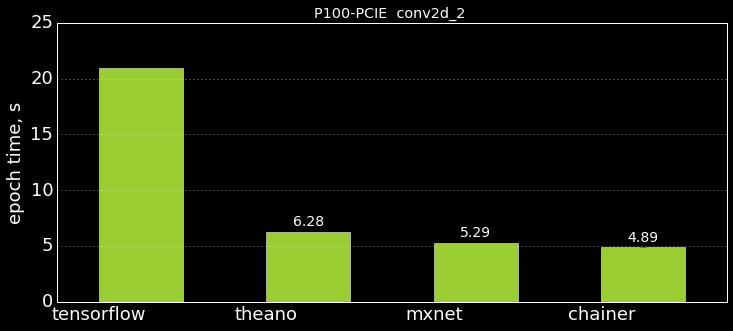

In [22]:
#    color=["dodgerblue","yellowgreen"][id_dev]
for problem in df["problem"].unique():
    #render(key="framework",filters={"device":"E5-2699","problem":problem},color="dodgerblue")
    render(key="framework",filters={"device":"P100-PCIE","problem":problem},color="yellowgreen")



conv3d_1_chainer


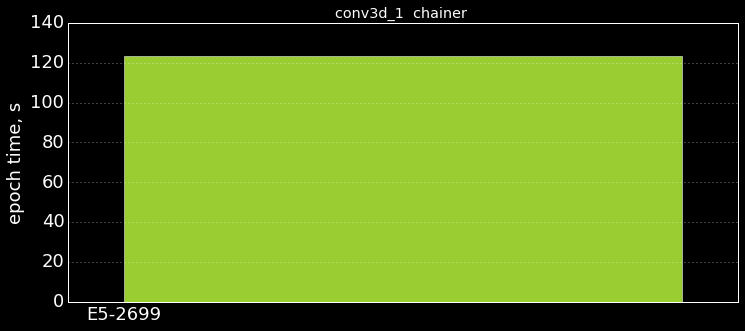

conv2d_1_chainer


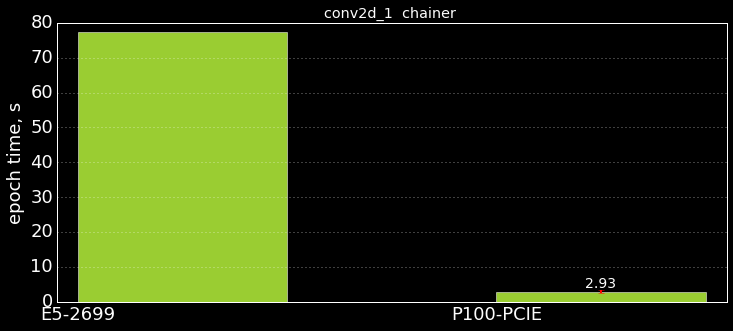

conv2d_2_chainer


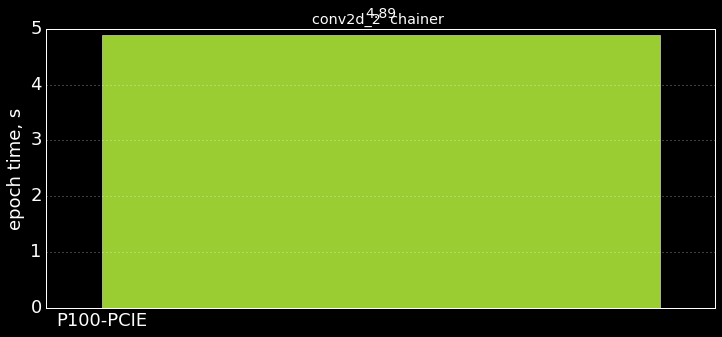

In [23]:
for problem in df["problem"].unique():
    render(key="device",filters={"problem":problem,"framework":"chainer"},color="yellowgreen")